# Project 1

### "How can an e-commerce or subscription business identify customers who are likely to stop using the service, so they can take proactive retention actions?"

### Main
- Predict if a customer will churn (Yes/No)
- Identify Key Factors influencing churn
- Recommend Business Actions

In [65]:
import pandas as pd

df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [66]:
print(df.head()) 

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### Data
- Customer ID
- Gender (Male/Female) - (1/0)
- Senior Citizen (Yes/No) - (1/0)
- Partner (Yes/No) - (1/0)
- Dependents (Yes/No) - (1/0)
- Tenure (Number of months the customer has stayed with the company)
- Phone Service (Yes/No) - (1/0)
- Multiple Line (Yes/No/No Phone Service) - (1/2/3)
- Internet Service (Fiber optic/DSL/No) - (1/2/3)
- Online Security (Yes/No/No internet service) - (1/2/3)
- Online Backup (Yes/No/No internet service) - (1/2/3)
- Device Protection (Yes/No/No internet service) - (1/2/3)
- Tech Support (Yes/No/No internet service) - (1/2/3)
- Streaming TV (Yes/No/No internet service) - (1/2/3)
- Streaming Movies (Yes/No/No internet service) - (1/2/3)
- Contract (Month-to-month/One year/Two year) - (1/2/3)
- Paperless Billing (Yes/No) - (1/0)
- Payment Method (Electronic Check/Mailed Check/Bank Transfer (Automatic)/Credit Card (Automatic)) - (1/2/3/4)
- Monthly Charges (float)
- Total Charges (float)
- Churn (Yes/No) - (1/0)

In [67]:
# Data Exploration: Shape, Missing Values, Data Types
print('Shape:', df.shape)
print('Missing values per column:')
print(df.isnull().sum())

Shape: (7043, 21)
Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [68]:
print('Data types:')
print(df.dtypes)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [69]:
# Data Cleaning: Handle missing values
df = df.replace(' ', pd.NA)  # Replace blank strings with NA
df = df.dropna()  # Drop rows with missing values

In [70]:
# Show label encoding mapping for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    print(f"{col} mapping:")
    for idx, label in enumerate(le.classes_):
        print(f"  {idx}: {label}")
    print()

customerID mapping:
  0: 0002-ORFBO
  1: 0003-MKNFE
  2: 0004-TLHLJ
  3: 0011-IGKFF
  4: 0013-EXCHZ
  5: 0013-MHZWF
  6: 0013-SMEOE
  7: 0014-BMAQU
  8: 0015-UOCOJ
  9: 0016-QLJIS
  10: 0017-DINOC
  11: 0017-IUDMW
  12: 0018-NYROU
  13: 0019-EFAEP
  14: 0019-GFNTW
  15: 0020-INWCK
  16: 0020-JDNXP
  17: 0021-IKXGC
  18: 0022-TCJCI
  19: 0023-HGHWL
  20: 0023-UYUPN
  21: 0023-XUOPT
  22: 0027-KWYKW
  23: 0030-FNXPP
  24: 0031-PVLZI
  25: 0032-PGELS
  26: 0036-IHMOT
  27: 0040-HALCW
  28: 0042-JVWOJ
  29: 0042-RLHYP
  30: 0048-LUMLS
  31: 0048-PIHNL
  32: 0052-DCKON
  33: 0052-YNYOT
  34: 0056-EPFBG
  35: 0057-QBUQH
  36: 0058-EVZWM
  37: 0060-FUALY
  38: 0064-SUDOG
  39: 0064-YIJGF
  40: 0067-DKWBL
  41: 0068-FIGTF
  42: 0071-NDAFP
  43: 0074-HDKDG
  44: 0076-LVEPS
  45: 0078-XZMHT
  46: 0080-EMYVY
  47: 0080-OROZO
  48: 0082-LDZUE
  49: 0082-OQIQY
  50: 0083-PIVIK
  51: 0089-IIQKO
  52: 0093-EXYQL
  53: 0093-XWZFY
  54: 0094-OIFMO
  55: 0096-BXERS
  56: 0096-FCPUF
  57: 0098-BOWSO
  58

In [71]:
# Encoding Categorical Variables using Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print('Label encoded categorical features:')
print(df[categorical_cols].head())


# Normalizing/Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print('Scaled numerical features:')
print(df[numerical_cols].head())


Label encoded categorical features:
   customerID  gender  Partner  Dependents  PhoneService  MultipleLines  \
0        5365       0        1           0             0              1   
1        3953       1        0           0             1              0   
2        2558       1        0           0             1              0   
3        5524       1        0           0             0              1   
4        6500       0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             2                 0   
1                0               2             0                 2   
2                0               2             2                 0   
3                0               2             0                 2   
4                1               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0  

In [72]:
print('Data types:')
print(df.dtypes)

Data types:
customerID          float64
gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object


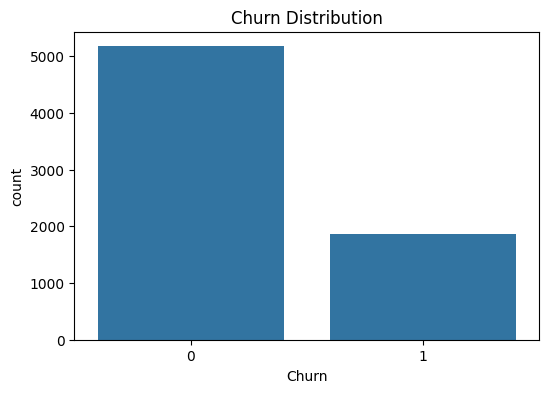

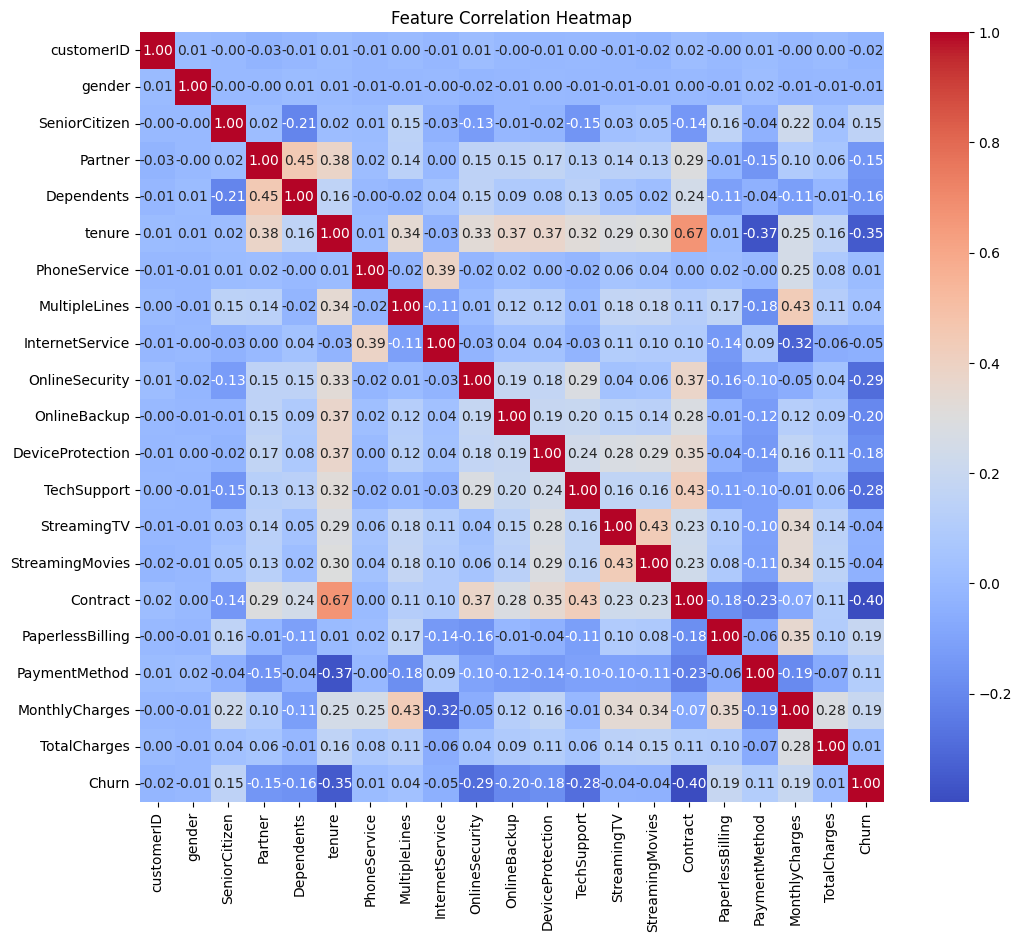

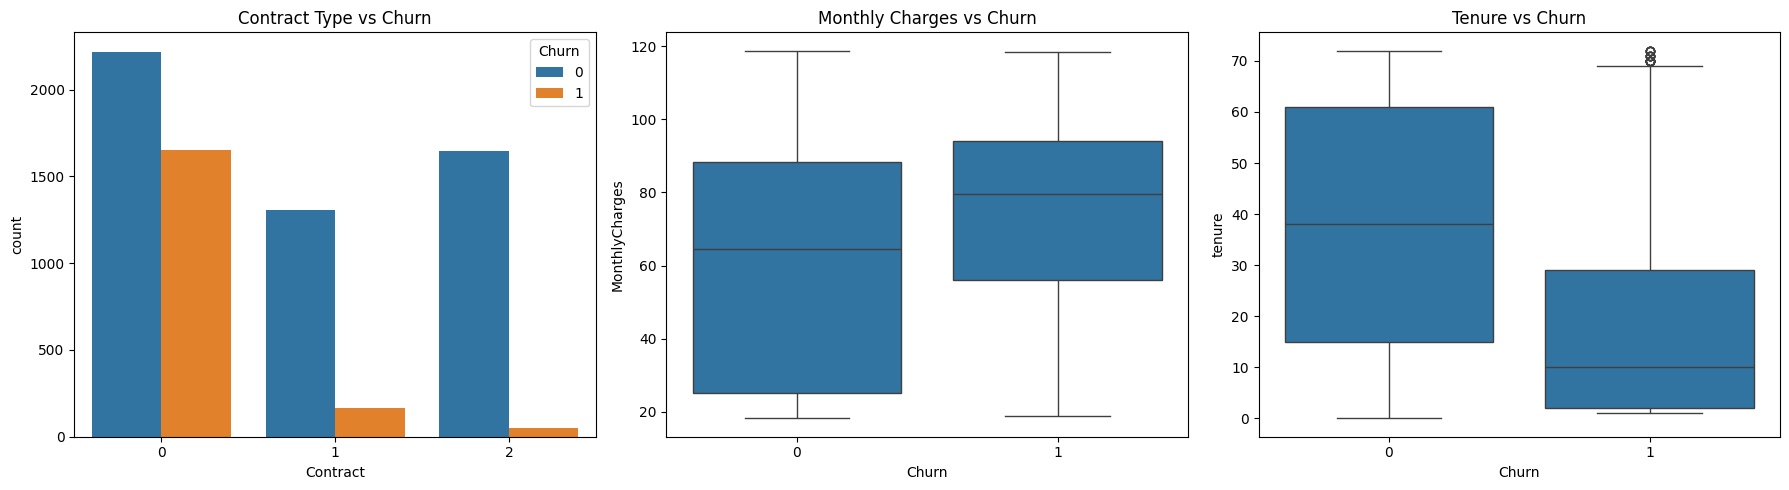

In [29]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn (class imbalance check)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Compare churn vs non-churn for Contract type, Monthly charges, Tenure
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Contract type vs Churn
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Contract Type vs Churn')

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[2])
axes[2].set_title('Tenure vs Churn')

plt.tight_layout()
plt.show()